In [1]:
pip install plotly.express

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='numpy')
import pickle

In [3]:
#Reading the csv
data_temp=pd.read_csv(r"C:\Users\Sahil Raj\Desktop\Max_Min_Seasonal_Temp_IMD-1901_to_2019_0.csv",index_col='YEAR')

In [4]:
data_temp

ANNUAL - MIN  ANNUAL - MAX  JAN-FEB - MIN  JAN-FEB - MAX  MAR-MAY - MIN  \
YEAR                                                                            
1901         19.51         28.96          14.16          23.27          20.67   
1902         19.44         29.22          13.64          25.75          21.12   
1903         19.25         28.47          13.87          24.24          20.25   
1904         19.22         28.49          13.72          23.62          20.72   
1905         19.03         28.30          12.81          22.25          19.97   
...            ...           ...            ...            ...            ...   
2015         19.96         29.90          14.53          25.74          20.91   
2016         21.28         31.63          16.17          28.33          23.15   
2017         21.17         31.42          15.72          27.95          22.68   
2018         20.57         31.22          14.76          27.72          22.21   
2019         20.83         30.88          14.63          26.79          22.13   

      MAR-MAY - MAX  JUN-SEP - MIN  JUN-SEP - MAX  OCT-DEC - MIN  \
YEAR                                                               
1901          31.46          23.38          31.27          16.59   
1902          31.76          23.28          31.09          16.50   
1903          30.71          23.40          30.92          16.29   
1904          30.95          22.96          30.66          16.44   
1905          30.00          23.43          31.33          16.39   
...             ...            ...            ...            ...   
2015          31.68          23.62          31.87          17.75   
2016          34.57          24.61          32.28          18.37   
2017          34.13          24.58          32.41          18.73   
2018          34.12          24.34          32.22          17.76   
2019          33.88          24.66          32.54          18.58   

      OCT-DEC - MAX  
YEAR                 
1901          27.25  
1902          26.49  
1903          26.26  
1904          26.40  
1905          26.57  
...             ...  
2015          28.27  
2016          30.03  
2017          29.69  
2018          29.35  
2019          28.40  

[119 rows x 10 columns]

In [5]:
#Data preprocessing
#calculating average temperature

# create a new column named averageannual temperature with values obtained by adding and dividing maximum and minnimum temperature
data_temp['AVG ANNUAL TEMP'] = (data_temp['ANNUAL - MAX'] + data_temp['ANNUAL - MIN'])/2

# insert the new column in specific position
data_temp.insert(2, "AVG ANNUAL TEMP", data_temp.pop('AVG ANNUAL TEMP'), True)
# display the dataframe
data_temp


ANNUAL - MIN  ANNUAL - MAX  AVG ANNUAL TEMP  JAN-FEB - MIN  \
YEAR                                                               
1901         19.51         28.96           24.235          14.16   
1902         19.44         29.22           24.330          13.64   
1903         19.25         28.47           23.860          13.87   
1904         19.22         28.49           23.855          13.72   
1905         19.03         28.30           23.665          12.81   
...            ...           ...              ...            ...   
2015         19.96         29.90           24.930          14.53   
2016         21.28         31.63           26.455          16.17   
2017         21.17         31.42           26.295          15.72   
2018         20.57         31.22           25.895          14.76   
2019         20.83         30.88           25.855          14.63   

      JAN-FEB - MAX  MAR-MAY - MIN  MAR-MAY - MAX  JUN-SEP - MIN  \
YEAR                                                               
1901          23.27          20.67          31.46          23.38   
1902          25.75          21.12          31.76          23.28   
1903          24.24          20.25          30.71          23.40   
1904          23.62          20.72          30.95          22.96   
1905          22.25          19.97          30.00          23.43   
...             ...            ...            ...            ...   
2015          25.74          20.91          31.68          23.62   
2016          28.33          23.15          34.57          24.61   
2017          27.95          22.68          34.13          24.58   
2018          27.72          22.21          34.12          24.34   
2019          26.79          22.13          33.88          24.66   

      JUN-SEP - MAX  OCT-DEC - MIN  OCT-DEC - MAX  
YEAR                                               
1901          31.27          16.59          27.25  
1902          31.09          16.50          26.49  
1903          30.92          16.29          26.26  
1904          30.66          16.44          26.40  
1905          31.33          16.39          26.57  
...             ...            ...            ...  
2015          31.87          17.75          28.27  
2016          32.28          18.37          30.03  
2017          32.41          18.73          29.69  
2018          32.22          17.76          29.35  
2019          32.54          18.58          28.40  

[119 rows x 11 columns]

In [6]:
#Getting the average temperature season wise
data_temp['JAN-FEB AVG'] = (data_temp['JAN-FEB - MIN'] + data_temp['JAN-FEB - MAX'])/2
data_temp['MAR-MAY AVG'] = (data_temp['MAR-MAY - MIN'] + data_temp['MAR-MAY - MAX'])/2
data_temp['JUN-SEP AVG'] = (data_temp['JUN-SEP - MIN'] + data_temp['JUN-SEP - MAX'])/2
data_temp['OCT-DEC AVG'] = (data_temp['OCT-DEC - MIN'] + data_temp['OCT-DEC - MAX'])/2

# insert the new column in specific position
data_temp.insert(5, "JAN-FEB AVG", data_temp.pop('JAN-FEB AVG'), True)
data_temp.insert(8, "MAR-MAY AVG", data_temp.pop('MAR-MAY AVG'), True)
data_temp.insert(11, "JUN-SEP AVG", data_temp.pop('JUN-SEP AVG'), True)
data_temp.insert(14, "OCT-DEC AVG", data_temp.pop('OCT-DEC AVG'), True)

# display the dataframe
data_temp


ANNUAL - MIN  ANNUAL - MAX  AVG ANNUAL TEMP  JAN-FEB - MIN  \
YEAR                                                               
1901         19.51         28.96           24.235          14.16   
1902         19.44         29.22           24.330          13.64   
1903         19.25         28.47           23.860          13.87   
1904         19.22         28.49           23.855          13.72   
1905         19.03         28.30           23.665          12.81   
...            ...           ...              ...            ...   
2015         19.96         29.90           24.930          14.53   
2016         21.28         31.63           26.455          16.17   
2017         21.17         31.42           26.295          15.72   
2018         20.57         31.22           25.895          14.76   
2019         20.83         30.88           25.855          14.63   

      JAN-FEB - MAX  JAN-FEB AVG  MAR-MAY - MIN  MAR-MAY - MAX  MAR-MAY AVG  \
YEAR                                                                          
1901          23.27       18.715          20.67          31.46       26.065   
1902          25.75       19.695          21.12          31.76       26.440   
1903          24.24       19.055          20.25          30.71       25.480   
1904          23.62       18.670          20.72          30.95       25.835   
1905          22.25       17.530          19.97          30.00       24.985   
...             ...          ...            ...            ...          ...   
2015          25.74       20.135          20.91          31.68       26.295   
2016          28.33       22.250          23.15          34.57       28.860   
2017          27.95       21.835          22.68          34.13       28.405   
2018          27.72       21.240          22.21          34.12       28.165   
2019          26.79       20.710          22.13          33.88       28.005   

      JUN-SEP - MIN  JUN-SEP - MAX  JUN-SEP AVG  OCT-DEC - MIN  OCT-DEC - MAX  \
YEAR                                                                            
1901          23.38          31.27       27.325          16.59          27.25   
1902          23.28          31.09       27.185          16.50          26.49   
1903          23.40          30.92       27.160          16.29          26.26   
1904          22.96          30.66       26.810          16.44          26.40   
1905          23.43          31.33       27.380          16.39          26.57   
...             ...            ...          ...            ...            ...   
2015          23.62          31.87       27.745          17.75          28.27   
2016          24.61          32.28       28.445          18.37          30.03   
2017          24.58          32.41       28.495          18.73          29.69   
2018          24.34          32.22       28.280          17.76          29.35   
2019          24.66          32.54       28.600          18.58          28.40   

      OCT-DEC AVG  
YEAR               
1901       21.920  
1902       21.495  
1903       21.275  
1904       21.420  
1905       21.480  
...           ...  
2015       23.010  
2016       24.200  
2017       24.210  
2018       23.555  
2019       23.490  

[119 rows x 15 columns]

<AxesSubplot:>

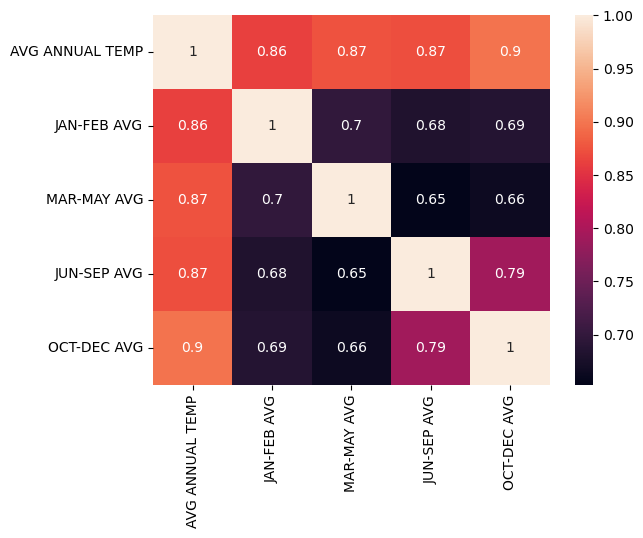

In [7]:
#getting the correlation between average annual temperature and seasonal temperature
avg_temp=data_temp.iloc[:,2::3]
avg_temp

sns.heatmap(avg_temp.corr(),annot=True)


In [8]:
#from the above correlation it is clear that average annual temperature is more positively correlated with seasonal AVG temperature
#hence we can build a model for prediction of future temperature by taking the average annual temperature

In [9]:
#data exploration
import plotly.express as px
# create a line plot
fig1 = px.line(data_temp, y=['ANNUAL - MIN','ANNUAL - MAX','AVG ANNUAL TEMP'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual AVERAGE, MINIMUM AND MAXIMUM TEMPERATURE',markers=True)
fig1.update_layout(width=1000, height=800)
fig1.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig1.show()


In [10]:
#Taking the data of last 20 years and interpret the data more clearly by visualising it
data_20years=data_temp.tail(20)
fig2 = px.line(data_20years,y=['ANNUAL - MIN','ANNUAL - MAX','AVG ANNUAL TEMP'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual AVERAGE, MINIMUM AND MAXIMUM TEMPERATURE last 20 years',markers=True)
fig2.update_layout(yaxis_title="Temperature (in °C)")
fig2.update_layout(width=1000, height=800)

In [11]:
#data exploration
# create a line plot
fig1 = px.line(data_20years, y=['JAN-FEB AVG','MAR-MAY AVG','JUN-SEP AVG','OCT-DEC AVG'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of  AVERAGE temperature season wise,',markers=True)
fig1.update_layout(width=1000, height=800)
fig1.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig1.show()


In [12]:
#from the above figures you can see the temperature was has a sudden increase in last few YEARS that is after 2015 which has #sudden increase of temperature with difference of almost 1.5 degree celcious
#droping the last 4  years data as it would be not fit welll in the time series model for the prediction of future temperature


# Time series model for average temperature

In [13]:
#Data Collection

#As part of data collection, I took the data of maximum ad minimum temperature from data.gov.in that had data of 1901 to 2019 of India
#The data is taken from data.gov.in and all the factors of taken data was given by some source names____?___
#The data was given in year wise form so the year was converted to date format through simple function in excel
#The main aim of the model is to predict the annual temperature of India of upcoming years and it is given in the 3rd column that acts as a target variable

In [14]:
temp_df = pd.read_csv(r"C:\Users\Sahil Raj\Desktop\datewisetemp.csv")
print("Shape of data: ", temp_df.shape)
temp_df.head()

Shape of data:  (119, 12)


YEAR  ANNUAL - MIN  ANNUAL-AVG  ANNUAL - MAX  JAN-FEB - MIN  \
0  31-12-1901         19.51      24.235         28.96          14.16   
1  31-12-1902         19.44      24.330         29.22          13.64   
2  31-12-1903         19.25      23.860         28.47          13.87   
3  31-12-1904         19.22      23.855         28.49          13.72   
4  31-12-1905         19.03      23.665         28.30          12.81   

   JAN-FEB - MAX  MAR-MAY - MIN  MAR-MAY - MAX  JUN-SEP - MIN  JUN-SEP - MAX  \
0          23.27          20.67          31.46          23.38          31.27   
1          25.75          21.12          31.76          23.28          31.09   
2          24.24          20.25          30.71          23.40          30.92   
3          23.62          20.72          30.95          22.96          30.66   
4          22.25          19.97          30.00          23.43          31.33   

   OCT-DEC - MIN  OCT-DEC - MAX  
0          16.59          27.25  
1          16.50          26.49  
2          16.29          26.26  
3          16.44          26.40  
4          16.39          26.57

In [15]:
#Data cleaning
annual_temp_data = temp_df.dropna()
#since for the model the focus is only on annual average temperatures other columns are dropped
#annual_temp_avg=annual_temp_data.iloc[:, :4]

annual_temp_data.index = pd.to_datetime(annual_temp_data.YEAR)
annual_temp_data = annual_temp_data["ANNUAL-AVG"]["1901-12-31":"2019-12-31"].astype(float)

annual_temp_data=pd.DataFrame(annual_temp_data)
annual_temp_data.describe()
#annual temp data

ANNUAL-AVG
count  119.000000
mean    24.309958
std      0.480176
min     23.565000
25%     24.007500
50%     24.165000
75%     24.512500
max     26.455000

In [16]:
#data exploration
# create a line plot
fig3= px.line(annual_temp_data,y=['ANNUAL-AVG'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual AVERAGE temperature',markers=True)
fig3.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig3.show()


In [17]:
#As you can see in the graph above there is sudden increase in the average temperature after 2015 so dropping the data from 2016-2019 for better result
annual_temp_avg = annual_temp_data.drop(annual_temp_data.tail(4).index)
annual_temp_avg

ANNUAL-AVG
YEAR                  
1901-12-31      24.235
1902-12-31      24.330
1903-12-31      23.860
1904-12-31      23.855
1905-12-31      23.665
...                ...
2011-12-31      24.700
2012-12-31      24.675
2013-12-31      24.820
2014-12-31      24.745
2015-12-31      24.930

[115 rows x 1 columns]

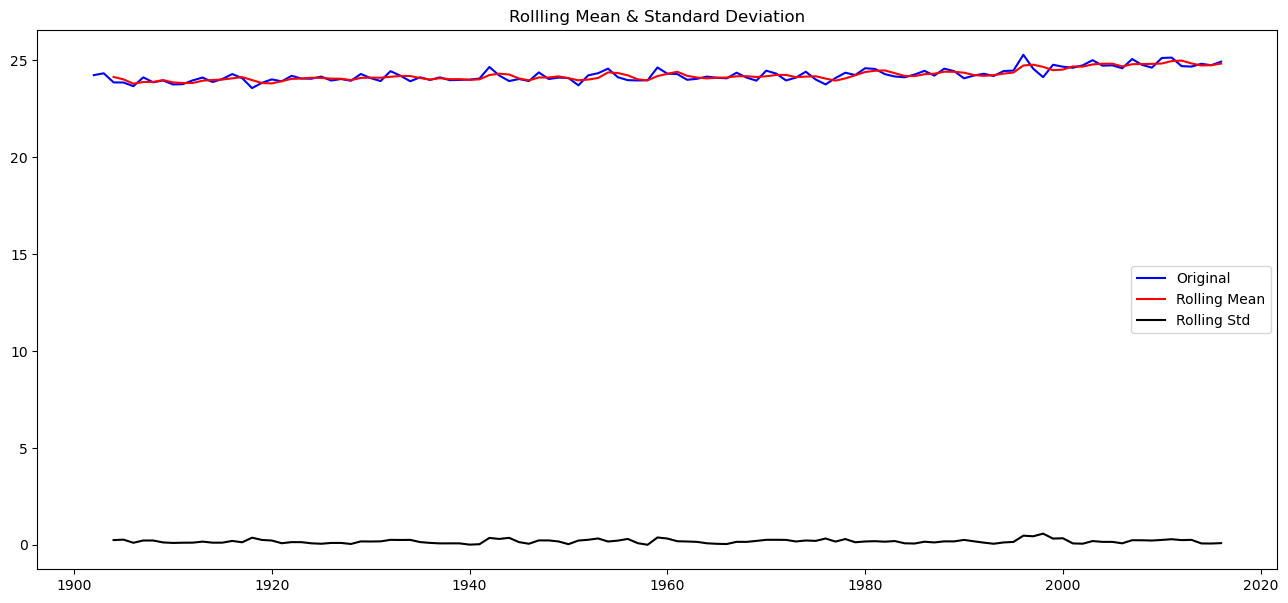

In [18]:
#rolling statistics
rollmean = annual_temp_avg.rolling(3).mean()
rollstd = annual_temp_avg.rolling(3).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_avg, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

In [19]:
#checking for the data if its statinary or not
from statsmodels.tsa.stattools import adfuller

# perform the ADF test
result1 = adfuller(annual_temp_data['ANNUAL-AVG'])

# Extract and print the p-value
p_value = result1[1]
print(f'p-value: {p_value}')


p-value: 0.9990880391623512


In [20]:
X = annual_temp_data.values
results1 = adfuller(X)
print('ADF Statistic: %f' % results1[0])
print('p-value: %f' % results1[1])
print('Critical Values:')
for key, value in results1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.732291
p-value: 0.999088
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


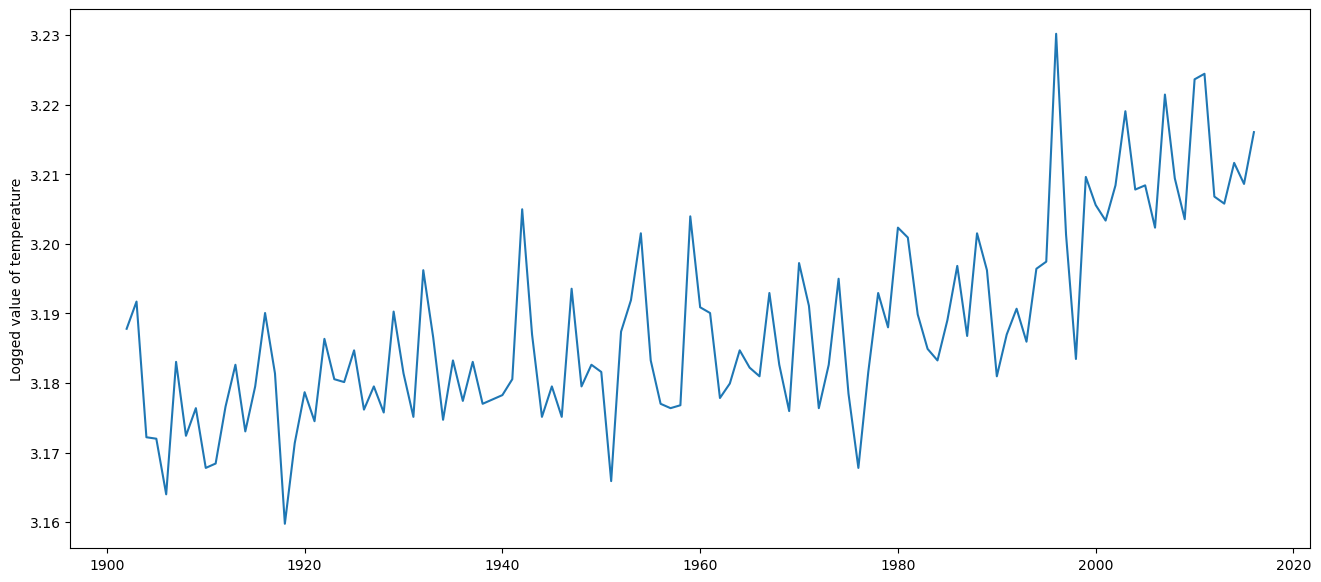

In [21]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.
#the graph of rolling mean and rolling standard deviation is not constant, this shows that ourdataset is not stationary
#There is need of making the data stationary

#transforma the data, using trial error and taking log as a random choice
plt.figure(figsize = (16, 7))
fig = plt.figure(1)

import numpy as np
annual_temp_avg_log = np.log(annual_temp_avg)
plt.plot(annual_temp_avg_log)
plt.ylabel("Logged value of temperature")
plt.show()

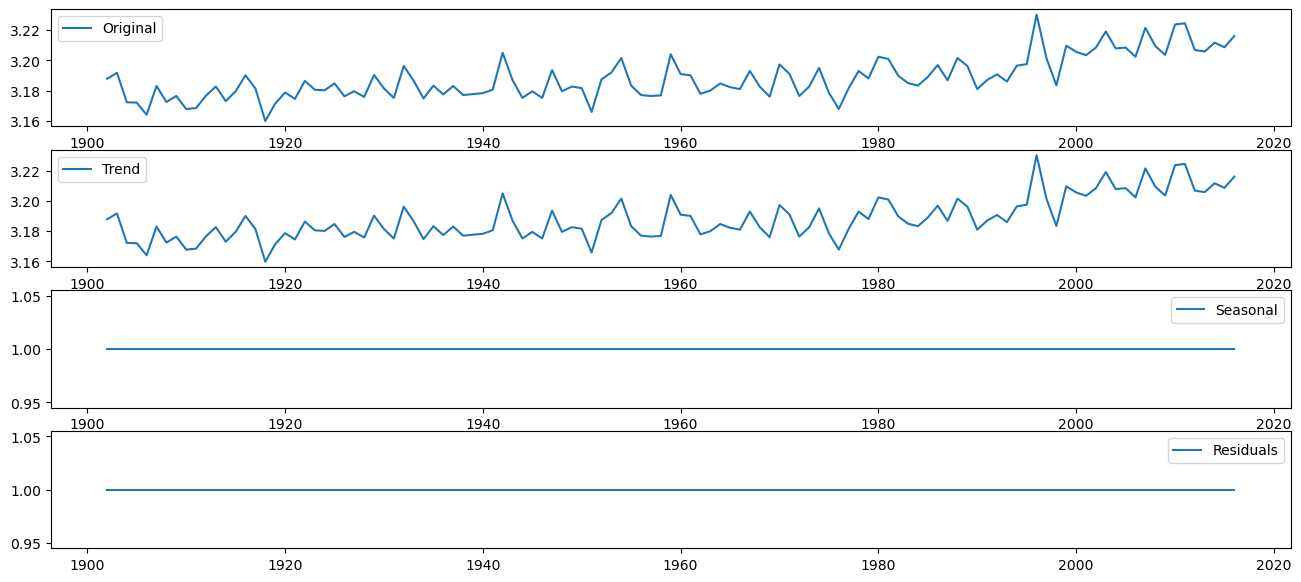

In [22]:
#decomposing the data (checking for seasonality or trend as the component)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(annual_temp_avg_log, model = 'multiplicative',period=1)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

plt.figure(figsize = (16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(annual_temp_avg_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend1, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal1, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual1, label = 'Residuals')
plt.legend(loc = 'best')

<Figure size 1600x700 with 0 Axes>

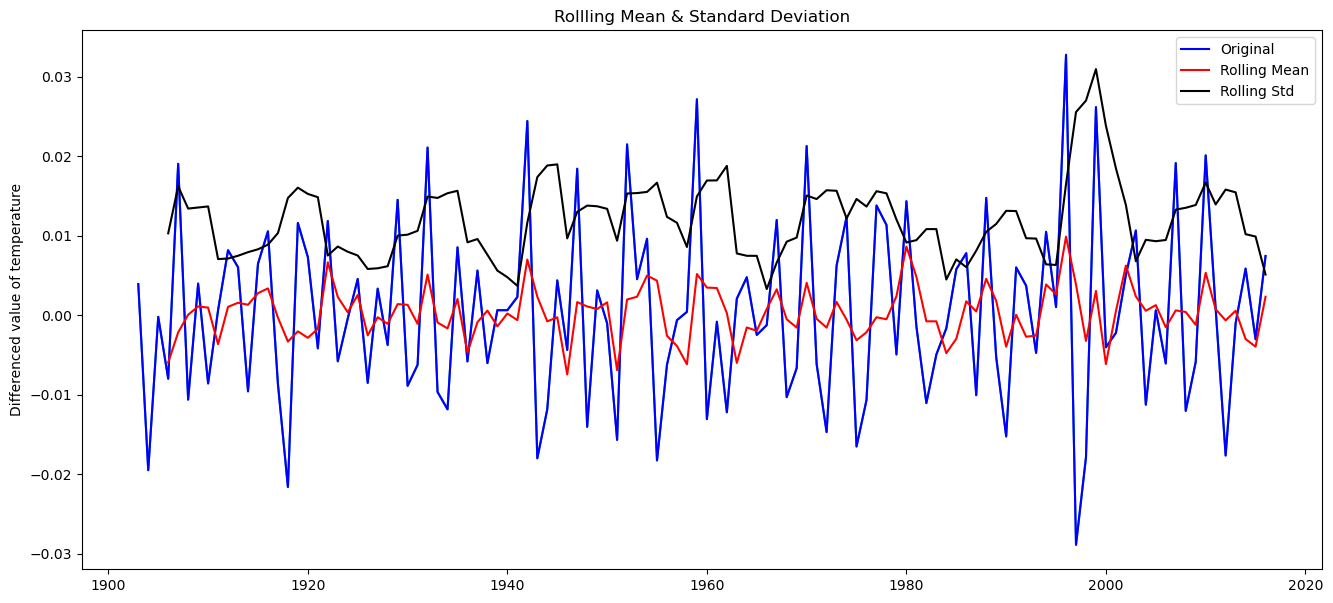

In [23]:
#as we can see from the above graphs, the trend factor is contributing to out data set more than the seasonality factor
#removing the trend component for making the data stationary by applying differencing

#creating a differenced time series [y(t) = y(t) - y(t-1)] 

plt.figure(figsize = (16,7))
fig = plt.figure(1)

annual_temp_avg_log_diff = annual_temp_avg_log - annual_temp_avg_log.shift(periods=1)
plt.plot(annual_temp_avg_log_diff)

#plotting the rolling statistics for checking if the data has become stationary or not
rollmean = annual_temp_avg_log_diff.rolling(4).mean()
rollstd =annual_temp_avg_log_diff.rolling(4).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_avg_log_diff, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.ylabel("Differenced value of temperature")
plt.legend(loc = 'best')

plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

#as we can see, the difference between the mean and std has reduced from earlier results

In [24]:
#method 2: Auto ARIMA
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p = 3,
                             start_q = 3,
                             max_p = 5,
                             max_q = 5,
                             test = 'adf',
                             seasonal = True,
                             trace = True)
    
    return automodel

In [25]:
annual_temp_avg_log_diff.dropna(inplace=True)
annual_temp_avg_log_diff

ANNUAL-AVG
YEAR                  
1902-12-31    0.003912
1903-12-31   -0.019507
1904-12-31   -0.000210
1905-12-31   -0.007997
1906-12-31    0.019044
...                ...
2011-12-31   -0.017657
2012-12-31   -0.001013
2013-12-31    0.005859
2014-12-31   -0.003026
2015-12-31    0.007448

[114 rows x 1 columns]

In [26]:
arimamodel(annual_temp_avg_log_diff)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-731.091, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-689.155, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-698.590, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-735.204, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-691.103, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-734.818, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-736.829, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-737.106, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-735.824, Time=0.52 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-736.612, Time=0.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-740.431, Time=0.48 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-735.473, Time=0.63 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-735.263, Time=0.45 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-739.006, Time=0.34 sec

Best model:  ARIMA(0,0,3)(0,0,0)

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [27]:
#hence, this gives the best order as 0,0,3

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.



Text(0.5, 1.0, 'red ones are the fitted values and the blue is the original values')

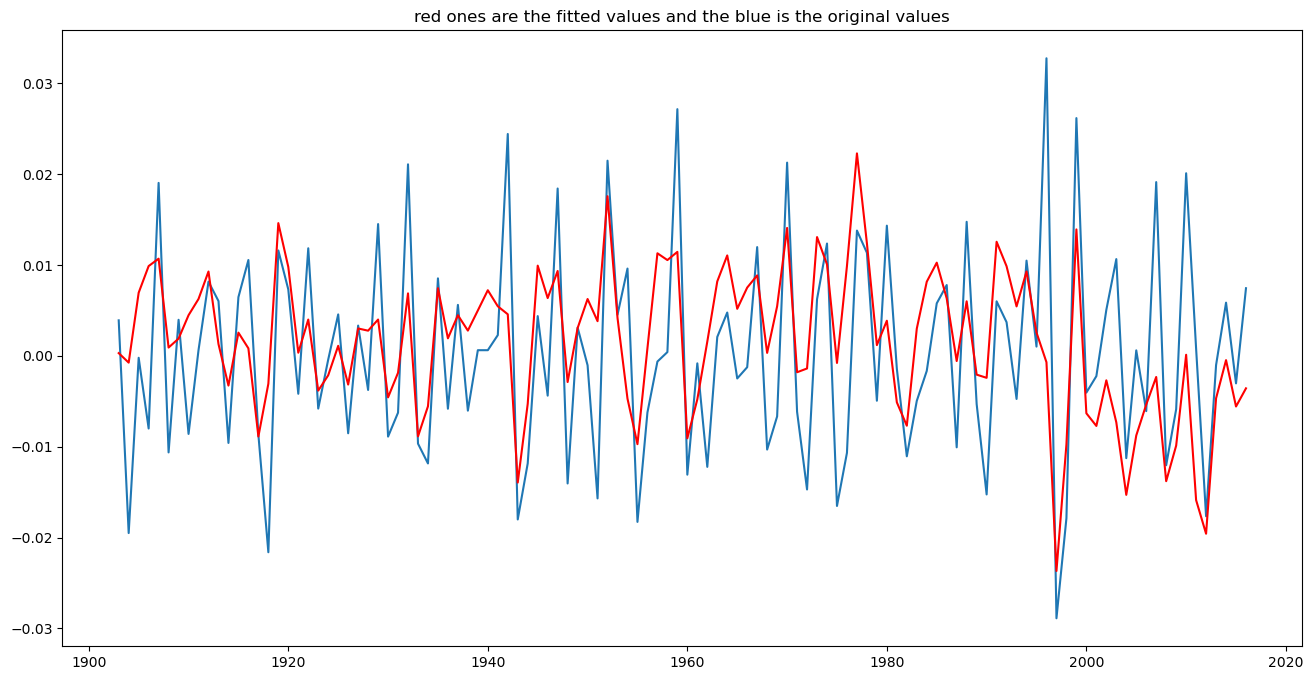

In [28]:
#substituting the values
#build a model
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize = (16,8))
model1 = ARIMA(annual_temp_avg_log_diff, order = (0,0,3))
results_ARIMA1 = model1.fit()
plt.plot(annual_temp_avg_log_diff)
plt.plot(results_ARIMA1.fittedvalues, color = 'red')

plt.title("red ones are the fitted values and the blue is the original values")
#red ones are the fitted values and the blue is the original values

In [29]:
#Forecasting the temperature of next 4 years from 2016 to 2019
forecast3=results_ARIMA1.forecast(steps=4)

forecast3=pd.DataFrame(forecast3)
forecast3

predicted_mean
2016-12-31       -0.007889
2017-12-31       -0.003781
2018-12-31        0.002107
2019-12-31        0.000303

In [30]:
start_date = pd.to_datetime('2016-12-31')
for i in range(4):
    new_date_1 = start_date + pd.DateOffset(years=i+1)
    annual_temp_avg_log_diff.loc[new_date_1] = [forecast3['predicted_mean'][i]]
annual_temp_avg_log_diff
#Data reconstructed as it had gine through lots of transformation
data_reconstructed3 = annual_temp_avg_log_diff.cumsum() + annual_temp_avg_log.iloc[0]
data_original3 = np.exp(data_reconstructed3)
data_original3




ANNUAL-AVG
YEAR                  
1902-12-31   24.330000
1903-12-31   23.860000
1904-12-31   23.855000
1905-12-31   23.665000
1906-12-31   24.120000
...                ...
2015-12-31   24.930000
2017-12-31   24.734092
2018-12-31   24.640750
2019-12-31   24.692715
2020-12-31   24.700201

[118 rows x 1 columns]

In [31]:
#data exploration
# create a line plot
fig_3= px.line(data_original3.tail(20),y=['ANNUAL-AVG'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual AVERAGE temperature predicted',markers=True)
fig_3.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig_3.show()


In [32]:
from statsmodels.tsa.arima_model import ARIMA

print(results_ARIMA1.summary())
print('AIC:',results_ARIMA1.aic)
print('BIC:',results_ARIMA1.bic)
print('HQIC:',results_ARIMA1.hqic)


                               SARIMAX Results                                
Dep. Variable:             ANNUAL-AVG   No. Observations:                  114
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 368.576
Date:                Mon, 13 Feb 2023   AIC                           -727.153
Time:                        22:07:59   BIC                           -713.472
Sample:                    12-31-1902   HQIC                          -721.600
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   4.47e-05      6.782      0.000       0.000       0.000
ma.L1         -0.7454      0.106     -7.040      0.000      -0.953      -0.538
ma.L2         -0.4090      0.139     -2.936      0.0

# Creating model for annual minimum temperatire form the year 1901

In [33]:
#Data cleaning
annual_temp_min = temp_df.dropna()
#since for the model the focus is only on annual average temperatures other columns are dropped
#annual_temp_avg=annual_temp_data.iloc[:, :4]

annual_temp_min.index = pd.to_datetime(annual_temp_min.YEAR)
annual_temp_min = annual_temp_min["ANNUAL - MIN"]["1901-12-31":"2019-12-31"].astype(float)

annual_temp_min=pd.DataFrame(annual_temp_min)
annual_temp_min.describe()
#annual temp data

ANNUAL - MIN
count    119.000000
mean      19.407143
std        0.414328
min       18.620000
25%       19.205000
50%       19.320000
75%       19.535000
max       21.280000

In [34]:
#data exploration
# create a line plot
fig4 = px.line(annual_temp_min,y=['ANNUAL - MIN'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual MIN temperature',markers=True)
fig4.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig4.show()


In [35]:
#As you can see in the graph above there is sudden increase in the MIN temperature after 2015 so dropping the data from 2016-2019 for better result
annual_temp_min = annual_temp_min.drop(annual_temp_min.tail(4).index)
annual_temp_min

ANNUAL - MIN
YEAR                    
1901-12-31         19.51
1902-12-31         19.44
1903-12-31         19.25
1904-12-31         19.22
1905-12-31         19.03
...                  ...
2011-12-31         19.58
2012-12-31         19.54
2013-12-31         19.83
2014-12-31         19.77
2015-12-31         19.96

[115 rows x 1 columns]

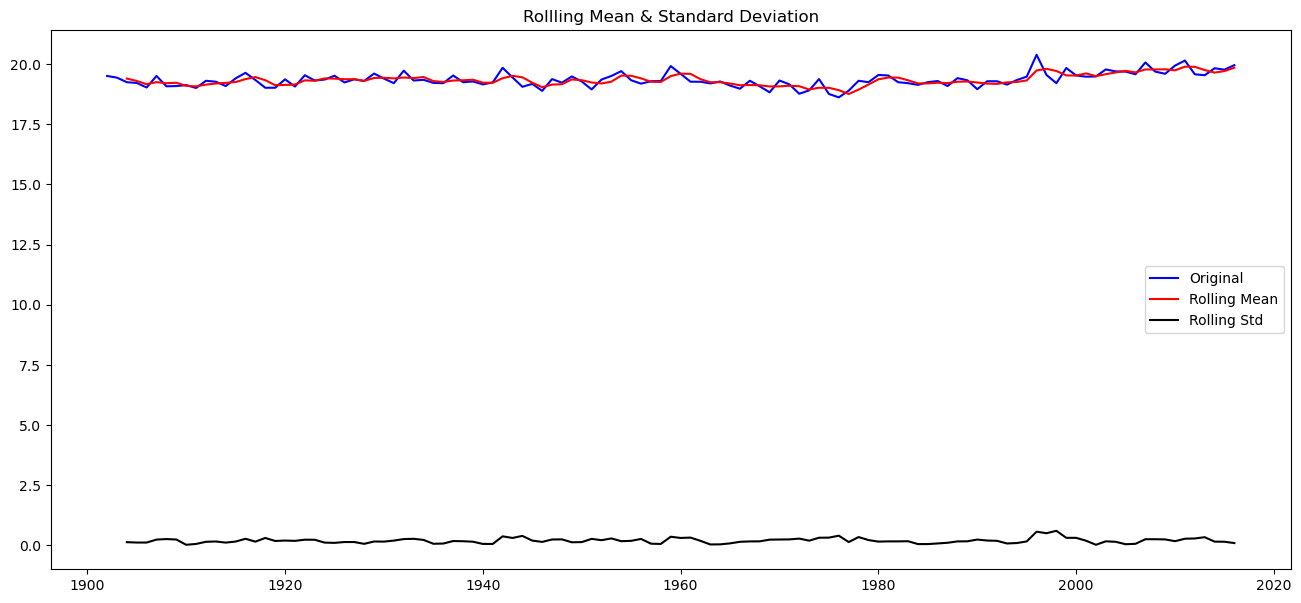

In [36]:
#rolling statistics
rollmean = annual_temp_min.rolling(3).mean()
rollstd = annual_temp_min.rolling(3).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_min, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

In [37]:
#checking for the data if its statinary or not
y = annual_temp_min.values
result2 = adfuller(y)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.868979
p-value: 0.798016
Critical Values:
	1%: -3.492
	5%: -2.889
	10%: -2.581


Text(0, 0.5, 'Logged value of temperature')

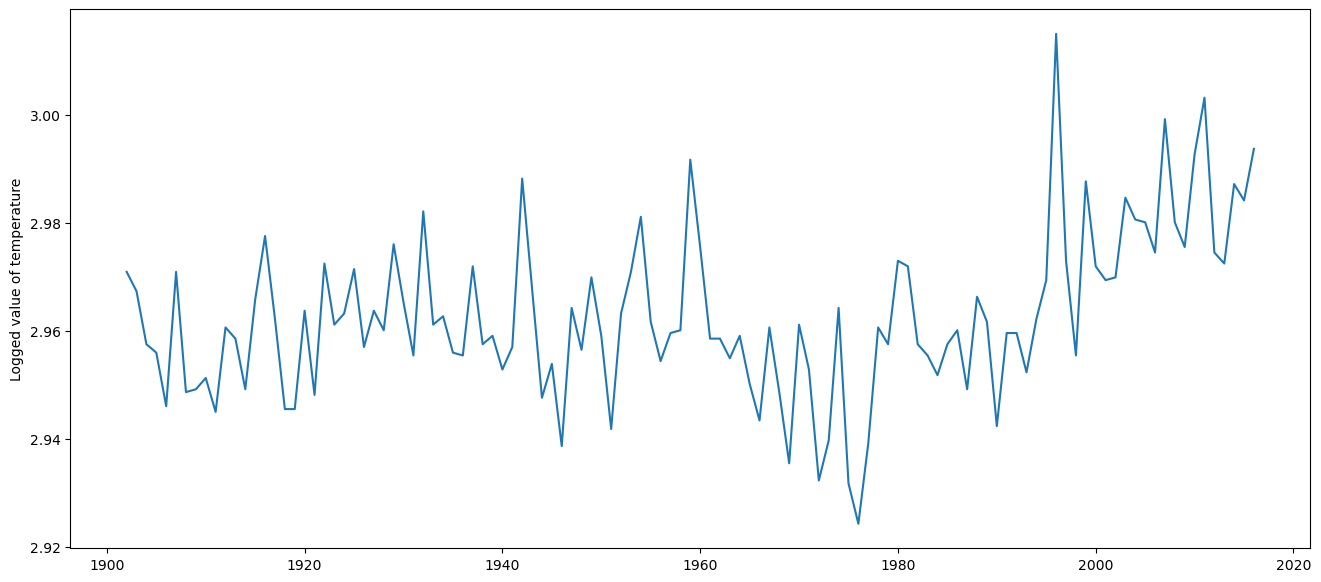

In [38]:
#The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

#Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.
#transforma the data, using trial error and taking log as a random choice
plt.figure(figsize = (16, 7))
fig = plt.figure(1)

import numpy as np
annual_temp_min_log = np.log(annual_temp_min)
plt.plot(annual_temp_min_log)
plt.ylabel("Logged value of temperature")

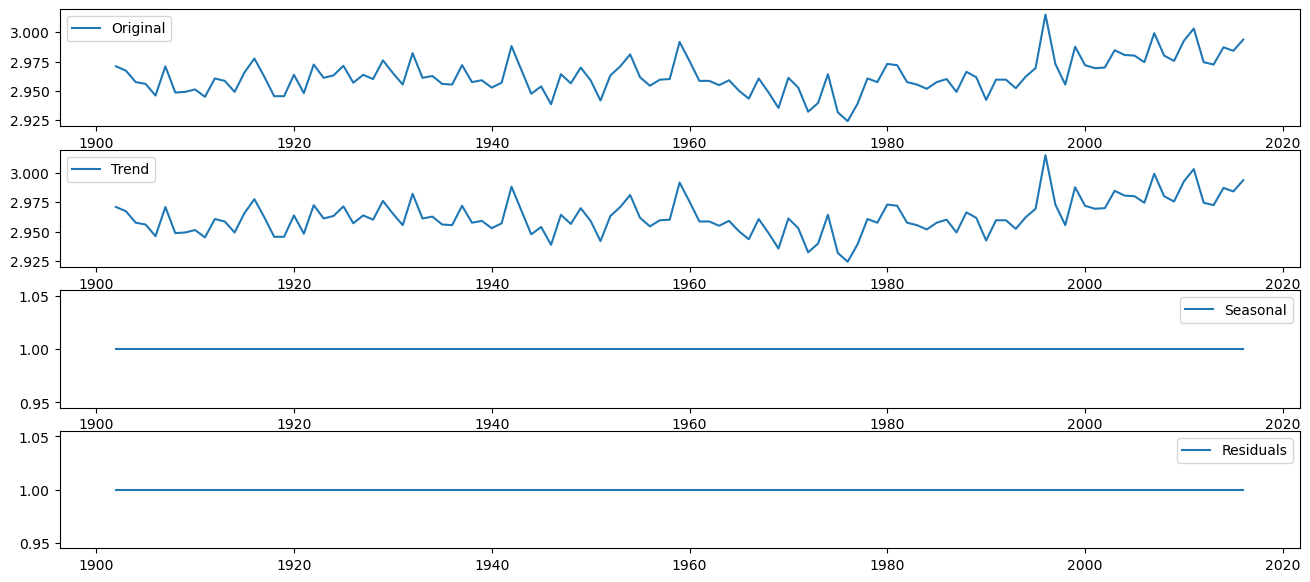

In [39]:
#decomposing the data (checking for seasonality or trend as the component)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition2 = seasonal_decompose(annual_temp_min_log, model = 'multiplicative',period=1)

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

plt.figure(figsize = (16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(annual_temp_min_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend2, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal2, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual2, label = 'Residuals')
plt.legend(loc = 'best')

<Figure size 1600x700 with 0 Axes>

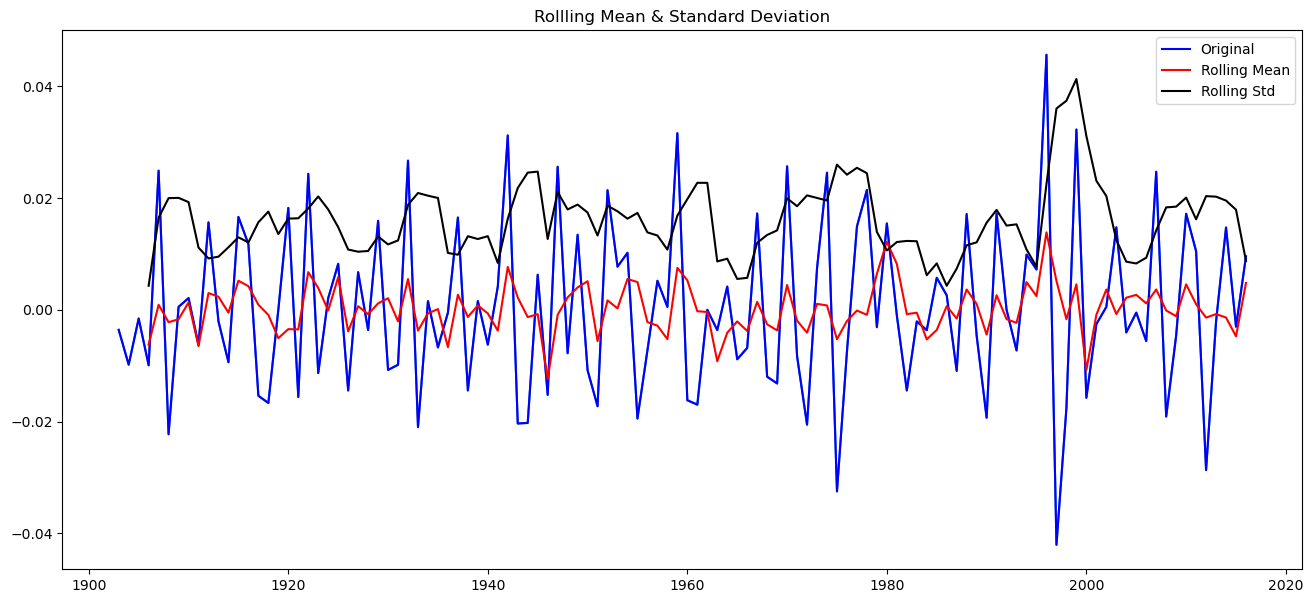

In [40]:
#as we can see from the above graphs, the trend factor is contributing to out data set more than the seasonality factor
#removing the trend component for making the data stationary by applying differencing

#creating a differenced time series [y(t) = y(t) - y(t-1)] 

plt.figure(figsize = (16,7))
fig = plt.figure(1)

annual_temp_min_log_diff = annual_temp_min_log - annual_temp_min_log.shift(periods=1)
plt.plot(annual_temp_min_log_diff)

#plotting the rolling statistics for checking if the data has become stationary or not
rollmean = annual_temp_min_log_diff.rolling(4).mean()
rollstd =annual_temp_min_log_diff.rolling(4).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_min_log_diff, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

#as we can see, the difference between the mean and std has reduced from earlier results

In [41]:
#method : Auto ARIMA
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p = 3,
                             start_q = 3,
                             max_p = 5,
                             max_q = 5,
                             test = 'adf',
                             seasonal = True,
                             trace = True)
    
    return automodel

In [42]:
annual_temp_min_log_diff.dropna(inplace=True)
annual_temp_min_log_diff

ANNUAL - MIN
YEAR                    
1902-12-31     -0.003594
1903-12-31     -0.009822
1904-12-31     -0.001560
1905-12-31     -0.009935
1906-12-31      0.024910
...                  ...
2011-12-31     -0.028696
2012-12-31     -0.002045
2013-12-31      0.014732
2014-12-31     -0.003030
2015-12-31      0.009565

[114 rows x 1 columns]

In [43]:
arimamodel(annual_temp_min_log_diff)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-662.840, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-624.299, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-635.161, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-664.288, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-626.280, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-664.091, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-656.179, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-670.507, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-668.758, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-667.206, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-667.987, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-666.118, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-666.839, Time=0.80 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-671.868, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]          

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.



Text(0.5, 1.0, 'Original vs Predicted graph')

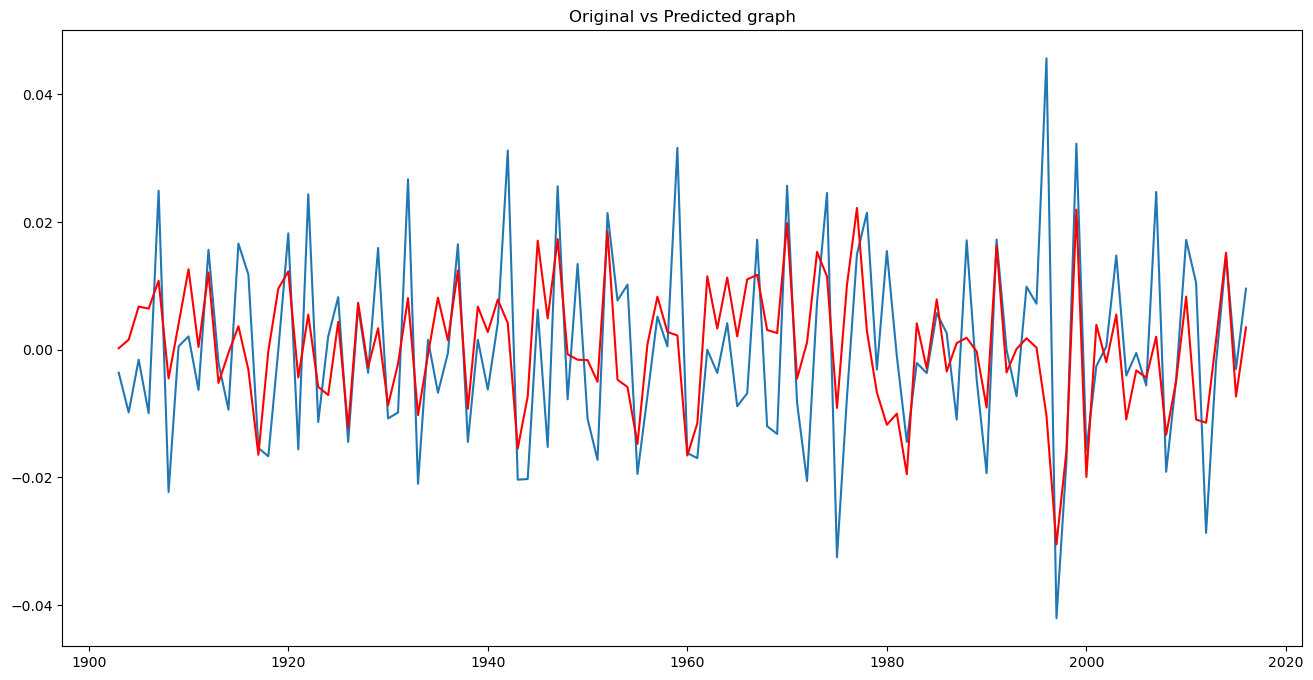

In [44]:
#substituting the values 1,0,2
#build a model
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize = (16,8))
model2 = ARIMA(annual_temp_min_log_diff, order = (1,0,2))
results_ARIMA2 = model2.fit()
plt.plot(annual_temp_min_log_diff)
plt.plot(results_ARIMA2.fittedvalues, color = 'red')
plt.title("Original vs Predicted graph")
#red ones are the fitted values and the blue is the original values

In [45]:
#Forecasting the temperature of next 2 years from 2016 to 2017
forecast2=results_ARIMA2.forecast(steps=10)

forecast2=pd.DataFrame(forecast2)
forecast2

predicted_mean
2016-12-31       -0.009065
2017-12-31        0.001994
2018-12-31       -0.001021
2019-12-31        0.001126
2020-12-31       -0.000403
2021-12-31        0.000686
2022-12-31       -0.000090
2023-12-31        0.000463
2024-12-31        0.000069
2025-12-31        0.000350

In [46]:
start_date = pd.to_datetime('2016-12-31')
for i in range(10):
    new_date_2= start_date + pd.DateOffset(years=i+1)
    annual_temp_min_log_diff.loc[new_date_2] = [forecast2['predicted_mean'][i]]
annual_temp_avg_log_diff
data_reconstructed2 = annual_temp_min_log_diff.cumsum() + annual_temp_min_log.iloc[0]
data_original2 = np.exp(data_reconstructed2)
data_original2


ANNUAL - MIN
YEAR                    
1902-12-31     19.440000
1903-12-31     19.250000
1904-12-31     19.220000
1905-12-31     19.030000
1906-12-31     19.510000
...                  ...
2022-12-31     19.827041
2023-12-31     19.825259
2024-12-31     19.834437
2025-12-31     19.835810
2026-12-31     19.842745

[124 rows x 1 columns]

In [47]:
#data exploration
# create a line plot
fig_4= px.line(data_original2.tail(20),y=['ANNUAL - MIN'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual MINIMUM temperature predicted',markers=True)
fig_4.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig_4.show()


In [48]:
from statsmodels.tsa.arima_model import ARIMA

print(results_ARIMA2.summary())
print('AIC:',results_ARIMA2.aic)
print('BIC:',results_ARIMA2.bic)
print('HQIC:',results_ARIMA2.hqic)


                               SARIMAX Results                                
Dep. Variable:           ANNUAL - MIN   No. Observations:                  114
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 340.009
Date:                Mon, 13 Feb 2023   AIC                           -670.019
Time:                        22:08:12   BIC                           -656.338
Sample:                    12-31-1902   HQIC                          -664.467
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.832      0.406      -0.000       0.001
ar.L1         -0.7123      0.104     -6.844      0.000      -0.916      -0.508
ma.L1          0.1276      0.076      1.688      0.0

# Model for the annual maximum temperature

In [49]:
#Data cleaning
annual_temp_max= temp_df.dropna()
#since for the model the focus is only on annual average temperatures other columns are dropped
#annual_temp_avg=annual_temp_data.iloc[:, :4]

annual_temp_max.index = pd.to_datetime(annual_temp_max.YEAR)
annual_temp_max = annual_temp_max["ANNUAL - MAX"]["1901-12-31":"2019-12-31"].astype(float)

annual_temp_max=pd.DataFrame(annual_temp_max)
annual_temp_max.describe()
#annual temp data

ANNUAL - MAX
count    119.000000
mean      29.212773
std        0.601737
min       28.110000
25%       28.760000
50%       29.110000
75%       29.550000
max       31.630000

In [50]:
#data exploration
# create a line plot
fig5 = px.line(annual_temp_max,y=['ANNUAL - MAX'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual MAX temperature',markers=True)
fig5.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig5.show()


In [51]:
#As you can see in the graph above there is sudden increase in the MIN temperature after 2015 so dropping the data from 2016-2019 for better result
annual_temp_max = annual_temp_max.drop(annual_temp_max.tail(4).index)
annual_temp_max

ANNUAL - MAX
YEAR                    
1901-12-31         28.96
1902-12-31         29.22
1903-12-31         28.47
1904-12-31         28.49
1905-12-31         28.30
...                  ...
2011-12-31         29.82
2012-12-31         29.81
2013-12-31         29.81
2014-12-31         29.72
2015-12-31         29.90

[115 rows x 1 columns]

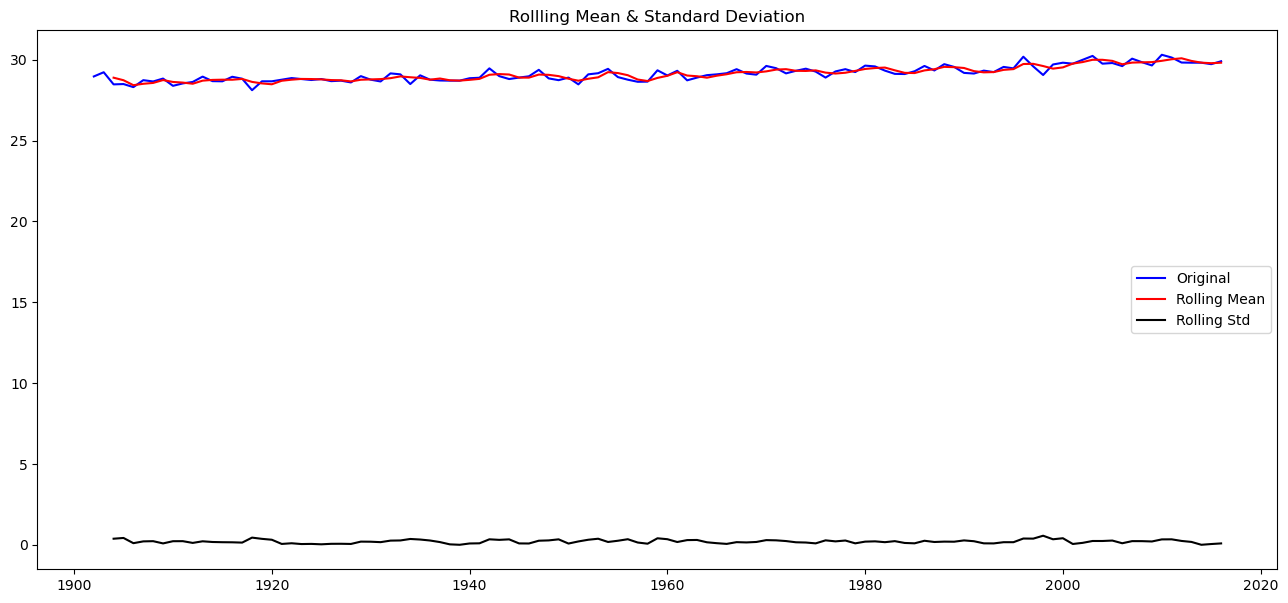

In [52]:
#rolling statistics
rollmean = annual_temp_max.rolling(3).mean()
rollstd = annual_temp_max.rolling(3).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_max, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

In [53]:
#checking for the data if its statinary or not
z = annual_temp_max.values
result3 = adfuller(z)
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Critical Values:')
for key, value in result3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.361856
p-value: 0.980011
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581


Text(0, 0.5, 'Logged value of temperature')

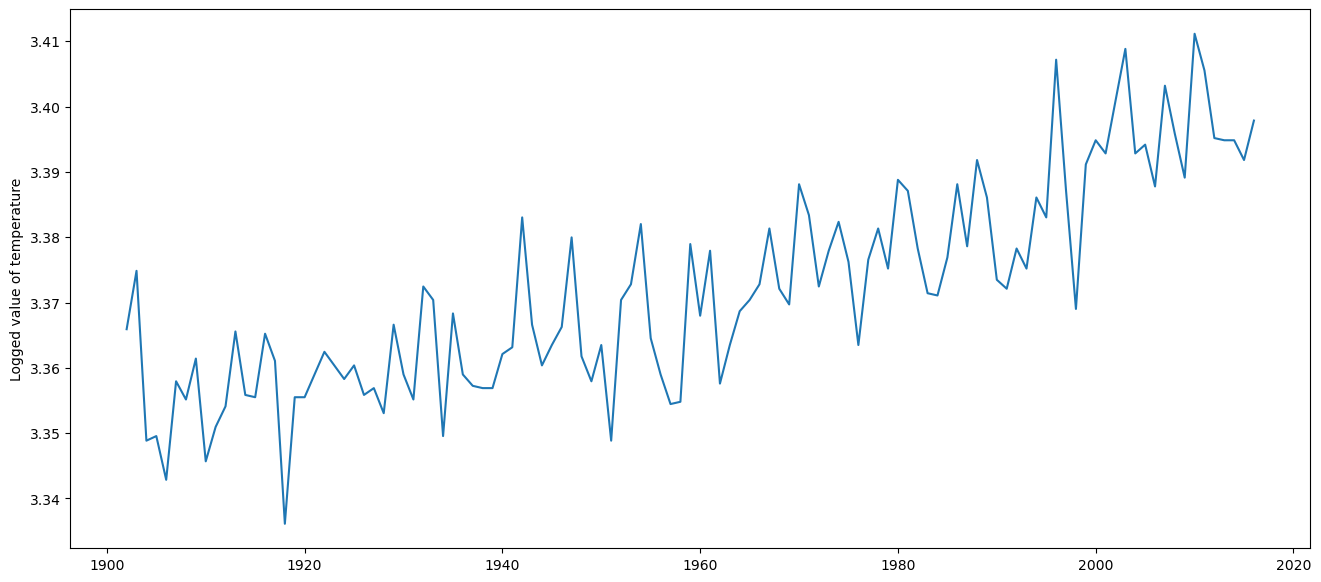

In [54]:
#The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

#Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.
#transforma the data, using trial error and taking log as a random choice
plt.figure(figsize = (16, 7))
fig = plt.figure(1)

import numpy as np
annual_temp_max_log = np.log(annual_temp_max)
plt.plot(annual_temp_max_log)
plt.ylabel("Logged value of temperature")

NameError: name 'trend' is not defined

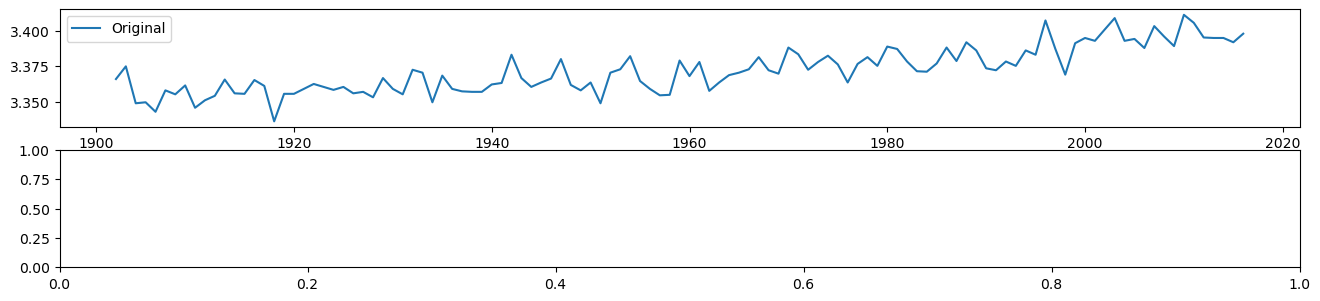

In [55]:
#decomposing the data (checking for seasonality or trend as the component)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition3 = seasonal_decompose(annual_temp_max_log, model = 'multiplicative',period=1)

trend3 = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid

plt.figure(figsize = (16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(annual_temp_max_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

In [ ]:
#as we can see from the above graphs, the trend factor is contributing to out data set more than the seasonality factor
#removing the trend component for making the data stationary by applying differencing

#creating a differenced time series [y(t) = y(t) - y(t-1)] 

plt.figure(figsize = (16,7))
fig = plt.figure(1)

annual_temp_max_log_diff = annual_temp_max_log - annual_temp_max_log.shift(periods=1)
plt.plot(annual_temp_min_log_diff)

#plotting the rolling statistics for checking if the data has become stationary or not
rollmean = annual_temp_max_log_diff.rolling(4).mean()
rollstd =annual_temp_max_log_diff.rolling(4).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plotting rolling statistcis
orig = plt.plot(annual_temp_max_log_diff, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rollling Mean & Standard Deviation')
plt.show(block = False)

#as we can see, the difference between the mean and std has reduced from earlier results

In [ ]:
#method : Auto ARIMA
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p = 3,
                             start_q = 3,
                             max_p = 5,
                             max_q = 5,
                             test = 'adf',
                             seasonal = True,
                             trace = True)
    
    return automodel

In [ ]:
annual_temp_max_log_diff.dropna(inplace=True)
annual_temp_max_log_diff

In [ ]:
arimamodel(annual_temp_max_log_diff)

In [ ]:
#substituting the values
#build a model
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize = (16,8))
model3 = ARIMA(annual_temp_max_log_diff, order = (0,0,1))
results_ARIMA3 = model3.fit()
plt.plot(annual_temp_max_log_diff,label='Original')
plt.plot(results_ARIMA3.fittedvalues, color = 'red',label='Predicted')
plt.title("Original vs predicted graph")
plt.show()
#red ones are the fitted values and the blue is the original values

In [ ]:
#Forecasting the temperature of next 2 years from 2016 to 2026
forecast1=results_ARIMA3.forecast(steps=10)

forecast1=pd.DataFrame(forecast1)
forecast1

In [ ]:
start_date = pd.to_datetime('2016-12-31')
for i in range(10):
    new_date_3 = start_date + pd.DateOffset(years=i+1)
    annual_temp_max_log_diff.loc[new_date_3] = [forecast1['predicted_mean'][i]]

In [ ]:
#Data reconstructed as it had gine through lots of transformation 
data_reconstructed = annual_temp_max_log_diff.cumsum() + annual_temp_max_log.iloc[0]
data_original = np.exp(data_reconstructed)
data_original

In [ ]:
#data exploration
# create a line plot
fig_5= px.line(data_original.tail(20),y=['ANNUAL - MAX'] ,labels={'x':'YEARS', 'y':'TEMPERATURE'} ,title='Line plot of Annual MAXIMUM temperature predicted',markers=True)
fig_5.update_layout(yaxis_title="Temperature (in °C)")
# display the plot
fig_5.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

print(results_ARIMA3.summary())
print('AIC:',results_ARIMA3.aic)
print('BIC:',results_ARIMA3.bic)
print('HQIC:',results_ARIMA3.hqic)
